In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)
card = pd.read_csv(r"C:\Users\jayu2\Downloads\creditcard.csv")
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
card.shape

(284807, 31)

In [6]:
# percentage of missing values in each column
round(100 * (card.isnull().sum()/len(card)),2).sort_values(ascending=False)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

In [7]:
# percentage of missing values in each row
round(100 * (card.isnull().sum(axis=1)/len(card)),2).sort_values(ascending=False)

0         0.0
189869    0.0
189875    0.0
189874    0.0
189873    0.0
         ... 
94942     0.0
94943     0.0
94944     0.0
94945     0.0
284806    0.0
Length: 284807, dtype: float64

In [8]:
card_d=card.copy()
card_d.drop_duplicates(subset=None, inplace=True)

In [9]:
card.shape

(284807, 31)

In [10]:
card_d.shape

(283726, 31)

In [11]:
## Assigning removed duplicate datase to original 
card=card_d
card.shape

(283726, 31)

In [12]:
del card_d

In [13]:
card.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

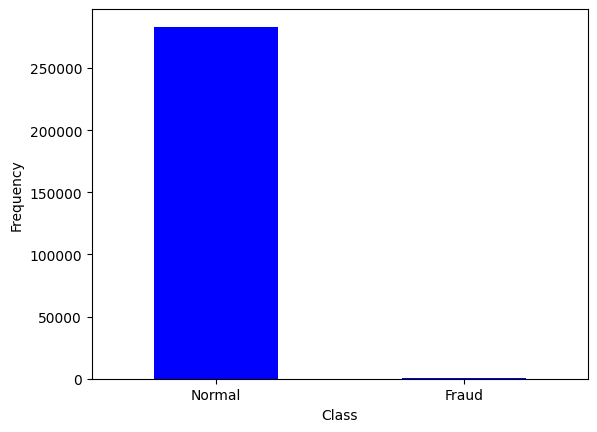

In [15]:
fraud_check=pd.value_counts(card['Class'],sort=True)
fraud_check.plot(kind='bar',rot=0,color='b')
plt.xlabel("Class")
plt.ylabel("Frequency")
labels=['Normal','Fraud']
plt.xticks(range(2),labels)
plt.show()

In [16]:
fraud_people=card[card['Class']==1]
normal_people=card[card['Class']==0]

In [17]:
fraud_people.shape

(473, 31)

In [18]:
normal_people.shape

(283253, 31)

In [19]:
fraud_people['Amount'].describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
normal_people['Amount'].describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

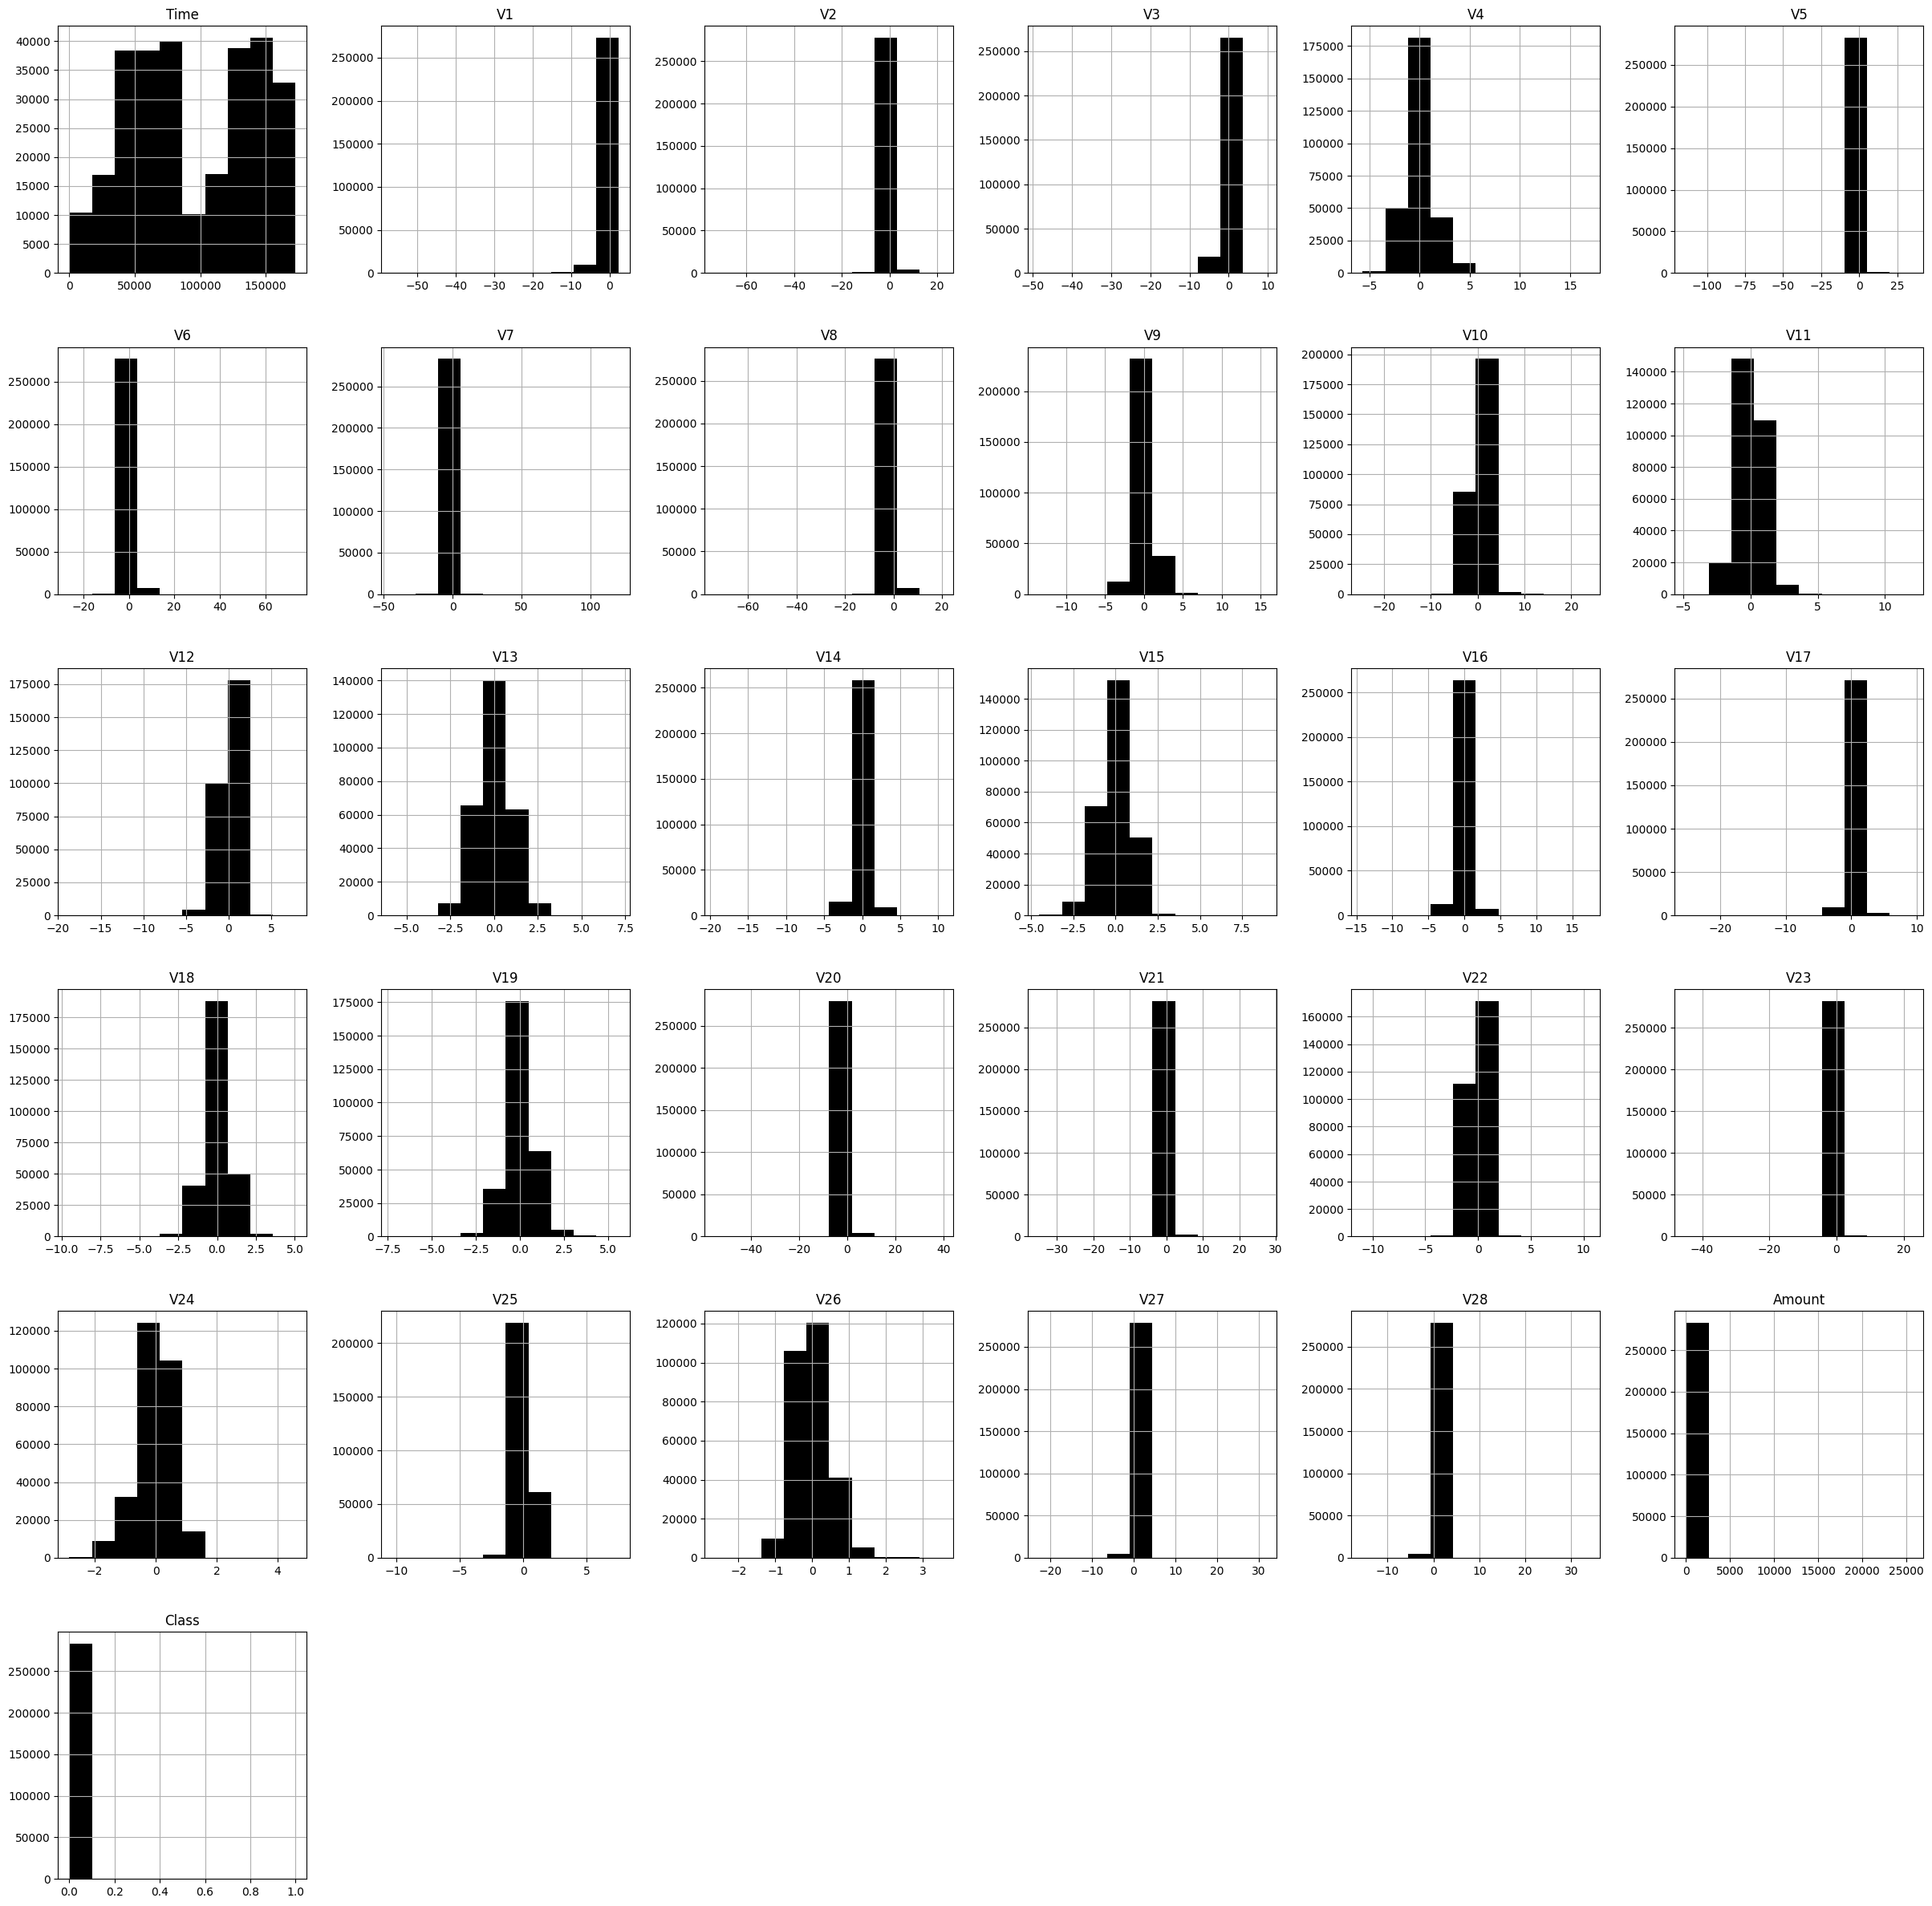

In [21]:
card.hist(figsize=(30,30),color='black')
plt.show()

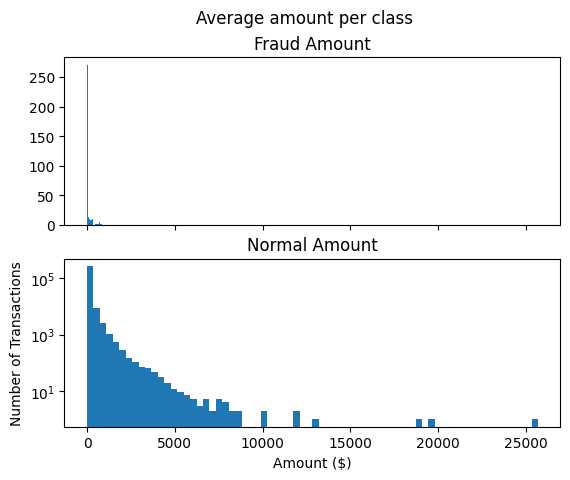

In [22]:
graph, (plot1, plot2) = plt.subplots(2,1,sharex= True) # sharex is used to check that graph donot overlapp
graph.suptitle('Average amount per class')
bins = 70

plot1.hist(fraud_people['Amount'] , bins = bins)
plot1.set_title('Fraud Amount')

plot2.hist(normal_people['Amount'] , bins = bins)
plot2.set_title('Normal Amount')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

In [23]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')

In [24]:
card.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

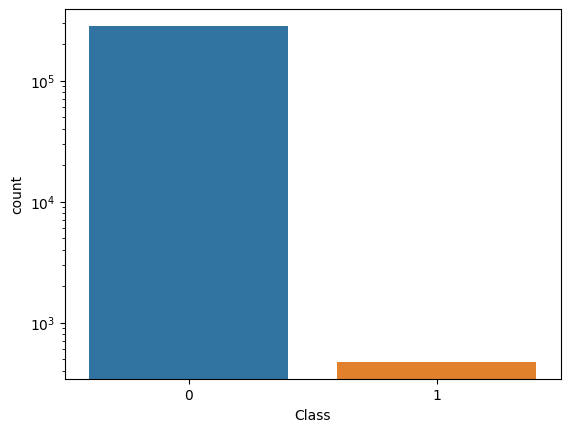

In [25]:
ax=sns.countplot(x='Class',data=card);
ax.set_yscale('log')

Text(0.5, 1.0, 'Correlation Matrix of Features')

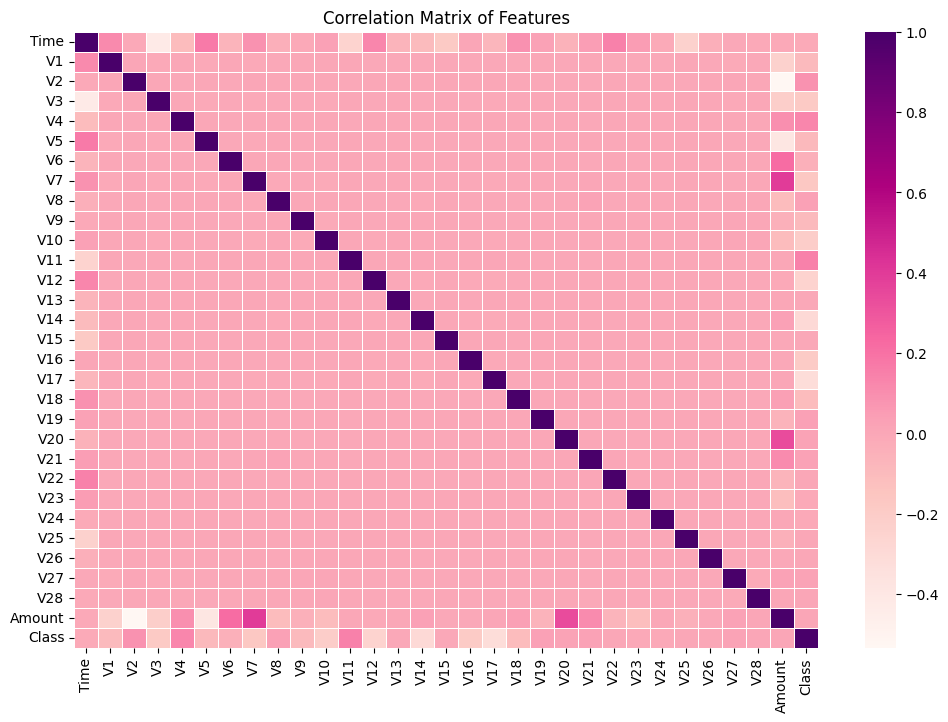

In [26]:
corr_matrix = card.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='RdPu', linewidths=0.5)
plt.title("Correlation Matrix of Features")

In [19]:
card.shape

(283726, 31)

In [20]:
card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [21]:
#Dropping Time as it's non business required data
estimators=[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [22]:
X1 = card[estimators]
y = card['Class']

In [23]:
col=X1.columns[:-1]
col

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [24]:
X = sm.add_constant(X1)
reg_logit = sm.Logit(y,X)
results_logit = reg_logit.fit()

Optimization terminated successfully.
         Current function value: 0.003927
         Iterations 13


In [25]:
results_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283696
Method:                           MLE   Df Model:                           29
Date:                Tue, 04 Jun 2024   Pseudo R-squ.:                  0.6815
Time:                        10:34:03   Log-Likelihood:                -1114.1
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7313      0.152    -57.566      0.000      -9.029      -8.434
V1             0.0842      0.041      2.029      0.042       0.003       0.166
V2             0.0142      0.058      0.244      0.807      -0.099       0.128
V3             0.0371      0.046      0.814      0.416      -0.052       0.126
V4             0.7085      0.074      9.606      0.000       0.564       0.853
V5             0.1034      0.066      1.576      0.115      -0.025       0.232
V6            -0.1269      0.076     -1.664      0.096      -0.276       0.023
V7            -0.1085      0.066     -1.640      0.101      -0.238       0.021
V8            -0.1713      0.031     -5.578      0.000      -0.231      -0.111
V9            -0.2598      0.110     -2.370      0.018      -0.475      -0.045
V10           -0.8242      0.097     -8.501      0.000      -1.014      -0.634
V11           -0.0090      0.076     -0.118      0.906      -0.158       0.140
V12            0.0625      0.086      0.725      0.468      -0.106       0.231
V13           -0.3147      0.081     -3.868      0.000      -0.474      -0.155
V14           -0.5361      0.062     -8.684      0.000      -0.657      -0.415
V15           -0.0922      0.084     -1.095      0.274      -0.257       0.073
V16           -0.2018      0.125     -1.616      0.106      -0.447       0.043
V17            0.0097      0.069      0.142      0.887      -0.125       0.145
V18           -0.0375      0.128     -0.294      0.769      -0.288       0.213
V19            0.0795      0.096      0.828      0.408      -0.109       0.268
V20           -0.4510      0.081     -5.541      0.000      -0.611      -0.291
V21            0.3730      0.058      6.416      0.000       0.259       0.487
V22            0.5874      0.129      4.566      0.000       0.335       0.840
V23           -0.0975      0.058     -1.681      0.093      -0.211       0.016
V24            0.1278      0.149      0.856      0.392      -0.165       0.421
V25           -0.0180      0.131     -0.137      0.891      -0.275       0.239
V26           -0.0131      0.190     -0.069      0.945      -0.385       0.359
V27           -0.8134      0.122     -6.658      0.000      -1.053      -0.574
V28           -0.2979      0.089     -3.343      0.001      -0.473      -0.123
Amount         0.0009      0.000      2.465      0.014       0.000       0.002
==============================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [26]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.0001):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(X,card.Class,col)

In [27]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283698
Method:                           MLE   Df Model:                           27
Date:                Tue, 04 Jun 2024   Pseudo R-squ.:                    -inf
Time:                        10:34:56   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V1            -3.8503      0.012   -314.625      0.000      -3.874      -3.826
V2             3.8048      0.012    310.135      0.000       3.781       3.829
V3            -8.5616      0.027   -319.025      0.000      -8.614      -8.509
V4             5.0462      0.016    313.283      0.000       5.015       5.078
V5            -5.9105      0.019   -314.060      0.000      -5.947      -5.874
V6            -2.0187      0.007   -271.803      0.000      -2.033      -2.004
V7           -11.1402      0.035   -318.515      0.000     -11.209     -11.072
V8             2.6585      0.009    284.651      0.000       2.640       2.677
V9            -5.4890      0.018   -309.594      0.000      -5.524      -5.454
V10          -12.7321      0.040   -318.828      0.000     -12.810     -12.654
V11            8.9049      0.028    316.080      0.000       8.850       8.960
V12          -16.0526      0.050   -319.507      0.000     -16.151     -15.954
V13            0.1949      0.005     37.561      0.000       0.185       0.205
V14          -16.6006      0.052   -319.557      0.000     -16.702     -16.499
V15           -0.3622      0.006    -63.189      0.000      -0.373      -0.351
V16          -15.1065      0.047   -318.684      0.000     -15.199     -15.014
V17          -27.3943      0.086   -320.370      0.000     -27.562     -27.227
V18          -10.1986      0.032   -315.451      0.000     -10.262     -10.135
V19            3.3170      0.012    273.860      0.000       3.293       3.341
V20            2.0012      0.009    210.708      0.000       1.983       2.020
V21            2.2942      0.010    231.734      0.000       2.275       2.314
V22            0.1861      0.007     25.998      0.000       0.172       0.200
V23           -0.2017      0.009    -21.842      0.000      -0.220      -0.184
V24           -0.1602      0.008    -18.862      0.000      -0.177      -0.144
V25            0.6242      0.011     59.429      0.000       0.604       0.645
V26            0.2029      0.011     18.870      0.000       0.182       0.224
V27            2.5322      0.016    156.071      0.000       2.500       2.564
V28            1.1545      0.016     74.214      0.000       1.124       1.185
==============================================================================
"""

In [28]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

     CI 95%(2.5%)  CI 95%(97.5%)    Odds Ratio  pvalue
V1   2.076848e-02   2.178906e-02  2.127265e-02     0.0
V2   4.385003e+01   4.601034e+01  4.491720e+01     0.0
V3   1.815011e-04   2.016353e-04  1.913035e-04     0.0
V4   1.506059e+02   1.604219e+02  1.554365e+02     0.0
V5   2.612588e-03   2.812611e-03  2.710756e-03     0.0
V6   1.309120e-01   1.347793e-01  1.328315e-01     0.0
V7   1.355458e-05   1.554635e-05  1.451635e-05     0.0
V8   1.401585e+01   1.453848e+01  1.427477e+01     0.0
V9   3.990901e-03   4.278129e-03  4.132020e-03     0.0
V10  2.732381e-06   3.195398e-06  2.954834e-06     0.0
V11  6.971871e+03   7.785935e+03  7.367668e+03     0.0
V12  9.675672e-08   1.178184e-07  1.067695e-07     0.0
V13  1.202850e+00   1.227562e+00  1.215143e+00     0.0
V14  5.575098e-08   6.834237e-08  6.172645e-08     0.0
V15  6.883531e-01   7.039955e-01  6.961304e-01     0.0
V16  2.506076e-07   3.017815e-07  2.750068e-07     0.0
V17  1.071538e-12   1.498226e-12  1.267046e-12     0.0
V18  3.493

In [29]:
new_features=card[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V20','V21', 'V22', 'V23', 'V25', 'V26', 'V27','Class']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,stratify=y,random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.86      0.58      0.69        95

    accuracy                           1.00     56746
   macro avg       0.93      0.79      0.85     56746
weighted avg       1.00      1.00      1.00     56746



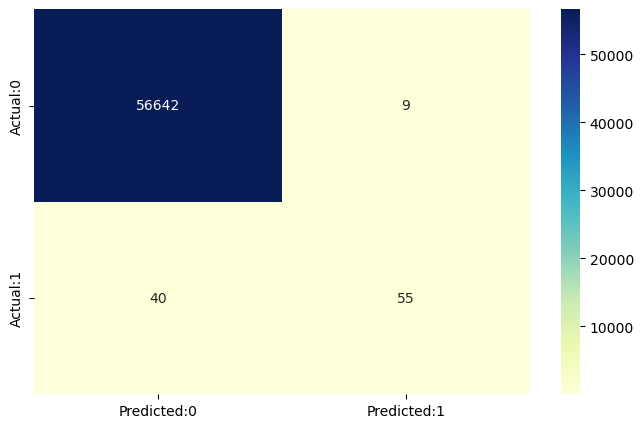

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [33]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [34]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =       ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) =               ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) =               ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)



The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =        0.9991365030134283 
 The Missclassification = 1-Accuracy =                   0.0008634969865717324 
 Sensitivity or True Positive Rate = TP/(TP+FN) =        0.5789473684210527 
 Specificity or True Negative Rate = TN/(TN+FP) =        0.9998411325484104 
 Positive Predictive value = TP/(TP+FP) =                0.859375 
 Negative predictive Value = TN/(TN+FN) =                0.9992943085988497 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  3644.2163742691573 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.42111953376609135


In [35]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of Not Fraud (0)','Prob of Fraud (1)'])
y_pred_prob_df.head()

,Prob of Not Fraud (0),Prob of Fraud (1)
0,0.999646,0.000354
1,0.999751,0.000249
2,0.999876,0.000124
3,0.999850,0.000150
4,0.998800,0.001200


In [40]:
# Prepare data for modeling
X = card.iloc[:, :-1].values
y = card.iloc[:, -1].values

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

# Train a logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Analyze different thresholds for classification
for i in range(1, 10):
    y_pred_prob_yes = logreg.predict_proba(X_test)[:, 1]
    y_pred2 = binarize(y_pred_prob_yes.reshape(-1, 1), threshold=i/10).flatten()
    cm2 = confusion_matrix(y_test, y_pred2)
    print(f'With {i/10:.1f} threshold the Confusion Matrix is:\n{cm2}\n'
          f'with {cm2[0,0] + cm2[1,1]} correct predictions and {cm2[1,0]} Type II errors (False Negatives)\n'
          f'Sensitivity: {cm2[1,1] / float(cm2[1,1] + cm2[1,0]):.2f}, Specificity: {cm2[0,0] / float(cm2[0,0] + cm2[0,1]):.2f}\n')

With 0.1 threshold the Confusion Matrix is:
[[84935    34]
 [   36   113]]
with 85048 correct predictions and 36 Type II errors (False Negatives)
Sensitivity: 0.76, Specificity: 1.00

With 0.2 threshold the Confusion Matrix is:
[[84944    25]
 [   38   111]]
with 85055 correct predictions and 38 Type II errors (False Negatives)
Sensitivity: 0.74, Specificity: 1.00

With 0.3 threshold the Confusion Matrix is:
[[84950    19]
 [   42   107]]
with 85057 correct predictions and 42 Type II errors (False Negatives)
Sensitivity: 0.72, Specificity: 1.00

With 0.4 threshold the Confusion Matrix is:
[[84950    19]
 [   47   102]]
with 85052 correct predictions and 47 Type II errors (False Negatives)
Sensitivity: 0.68, Specificity: 1.00

With 0.5 threshold the Confusion Matrix is:
[[84952    17]
 [   51    98]]
with 85050 correct predictions and 51 Type II errors (False Negatives)
Sensitivity: 0.66, Specificity: 1.00

With 0.6 threshold the Confusion Matrix is:
[[84954    15]
 [   54    95]]
with 

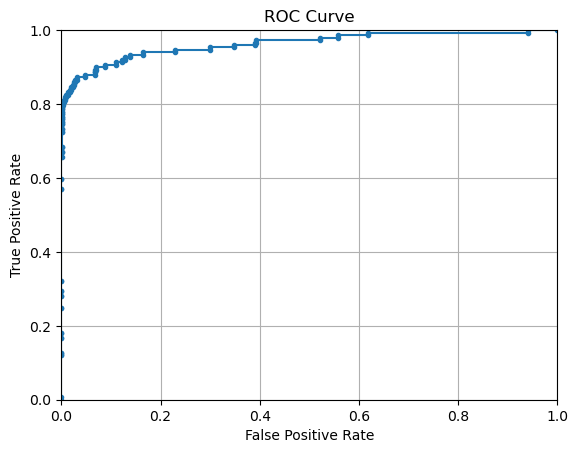

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the test set
y_pred_prob_yes = logreg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes)

# Plot the ROC curve
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid(True)
plt.show()

In [44]:
# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob_yes)
print(f'AUC: {auc:.2f}')

AUC: 0.96


In [60]:
from pycaret.classification import *
model= setup(data = card, target= 'Class') #Model 1

best=compare_models()

,Description,Value
0,Session id,5176
1,Target,Class
2,Target type,Binary
3,Original data shape,"(283726, 31)"
4,Transformed data shape,"(283726, 31)"
5,Transformed train set shape,"(198608, 31)"
6,Transformed test set shape,"(85118, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9995,0.9515,0.7583,0.9428,0.8375,0.8373,0.8438,123.6510
et,Extra Trees Classifier,0.9995,0.9545,0.7642,0.9564,0.8466,0.8464,0.8532,18.5890
lda,Linear Discriminant Analysis,0.9994,0.9836,0.7553,0.8629,0.8027,0.8023,0.8056,1.5920
ada,Ada Boost Classifier,0.9993,0.9745,0.7008,0.8402,0.7618,0.7614,0.7658,40.7950
lr,Logistic Regression,0.9992,0.9662,0.6102,0.8638,0.7121,0.7117,0.7240,19.8120
dt,Decision Tree Classifier,0.9992,0.8729,0.7462,0.7756,0.7538,0.7534,0.7569,10.5580
gbc,Gradient Boosting Classifier,0.9990,0.7175,0.5617,0.7961,0.6424,0.6420,0.6590,260.5190
ridge,Ridge Classifier,0.9989,0.9836,0.3988,0.8533,0.5399,0.5395,0.5807,0.3140
knn,K Neighbors Classifier,0.9984,0.5768,0.0181,0.5000,0.0348,0.0347,0.0939,32.9330
dummy,Dummy Classifier,0.9983,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2840


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

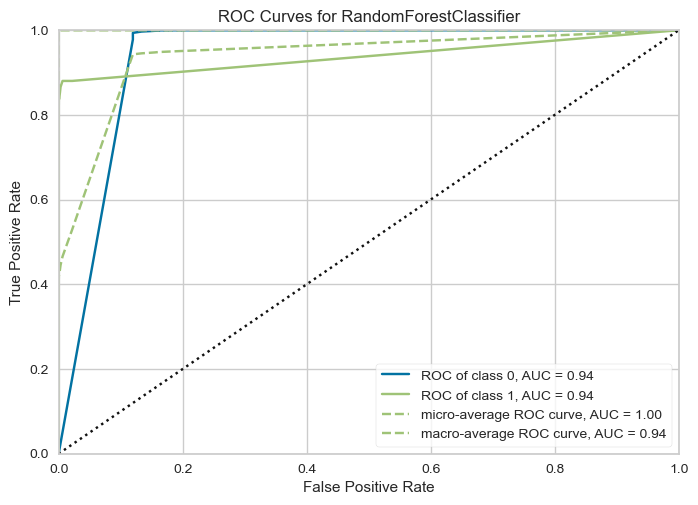

In [61]:
evaluate_model (best)
from pycaret.classification import plot_model
plot_model(best, plot = 'auc')

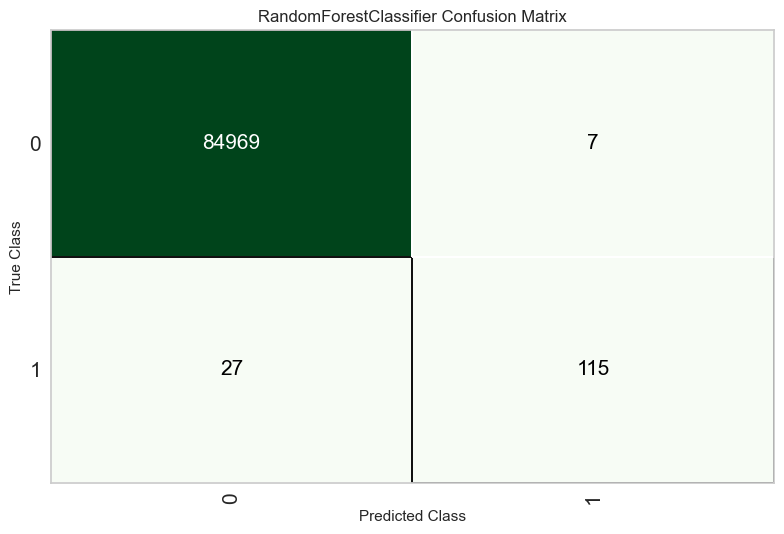

In [62]:
plot_model(best, plot = 'confusion_matrix')

In [63]:
random_forest= create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9996,0.9684,0.8182,0.9310,0.8710,0.8708,0.8726
1,0.9995,0.9528,0.7879,0.8966,0.8387,0.8385,0.8402
2,0.9993,0.9675,0.6667,0.9167,0.7719,0.7716,0.7814
3,0.9995,0.9218,0.6970,1.0000,0.8214,0.8212,0.8346
4,0.9993,0.9215,0.6364,0.9545,0.7636,0.7633,0.7791
5,0.9996,0.9688,0.8485,0.9032,0.8750,0.8748,0.8752
6,0.9995,0.9226,0.6970,1.0000,0.8214,0.8212,0.8346
7,0.9995,0.9547,0.7647,0.9630,0.8525,0.8522,0.8579
8,0.9997,0.9836,0.8788,0.9667,0.9206,0.9205,0.9216


In [64]:
pred_holdout = predict_model(random_forest,data= card)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9999,0.9817,0.9429,0.9845,0.9633,0.9632,0.9634


In [65]:
print(pred_holdout)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834784 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V23       V24  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.11047